In [ ]:
# preprocess a single image
# load the model
# predict with the model



In [13]:
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import tensorflow.keras as keras
import tensorflow as tf
from glob import glob
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
stream_name = 'BrownsBrook'

#load the model
#model can be found here: 
model_directory = f'/datadrive/model/{stream_name}'
model_type = 'simple_cnn_regression'
model_directory = f'{model_directory}/{model_type}/weights'
model_weight_file = f'{model_directory}/{model_type}.h5'
model_json_file = f'{model_directory}/{model_type}.json'

json_file = open(model_json_file, 'r')
loaded_model_json = json_file.read()
json_file.close()
model = keras.models.model_from_json(loaded_model_json)
model.load_weights(model_weight_file)

#load the sample data
sample_data_directory = f'/datadrive/stream_data/{stream_name}'

sample_files = glob(f'{sample_data_directory}/*')
i = np.random.choice(np.arange(len(sample_files)))
input_shape = (640,480)
sample = np.array(Image.open(sample_files[i]).resize(input_shape))/255.

Text(0.5, 1.0, 'Flow estimate : 1.06 m/s')

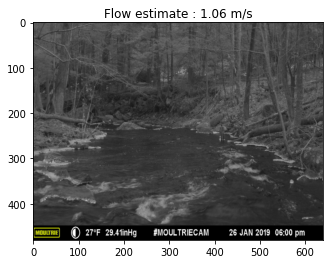

In [63]:
# estimate the flow and transform to m/2
log_estimate = model.predict(np.expand_dims(sample,0))
flow_estimate = np.exp(log_estimate)

plt.imshow(sample)
plt.title(f'Flow estimate : {flow_estimate[0][0]:0.2f} m/s')